#   Toronto vs. New York City 
### Capstone project by Praveen Kumar Yalamanchili

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

From an Ancient show that it is characterized by population density, symbolic function, and urban planning, have existed for thousands of years. In Modern day(Today) Cities generally have extensive systems for housing, transportation, sanitation, utilities, land use, and communication. Their density facilitates interaction between people, government organizations and businesses, sometimes benefiting different parties in the process.

A city is distinguished from other human settlements by its relatively great size, but also by its functions and 
its special symbolic status, which may be conferred by a central authority. The term can also refer either to the 
physical streets and buildings of the city or to the collection of people who dwell there, and can be used in a 
general sense to mean urban rather than rural territory.

And mostly Cities have become a main target areas for Business Employment and many other industries.

#### *Business Problem*

As we see many people migrate to different cities in the world for better lively hood , life, employment, entertainment etc. 

Our take in this project is to be able to compare two different cities based on the population , ethnicity and similarity of neighborhoods based on the Four Square Venues Data.

Upon successfully analyzing the data, one should be able to see the similarity or dissimilarity between New York City and City of Toronto from the perspective of Population diversity, Ethnicity and neighborhood venue data

#### *Target Audience*

*Target Audience would be any person or business who would be interested in comparing the Cities New York and Toronto based on their Population Diversity, Ethnicity and Neighborhood Data using Four Square API.*

# Data

Data collected from different entities such as wikipedia and official data websites presented by respective Countries/Cities.

#### **Sources of Data**

Population Demographic Data for the Cities were taken from below Sources

**City of Toronto:**

    Population Demographics and Ethnicity data: https://en.wikipedia.org/wiki/Demographics_of_Toronto

**New York City:**

    Population Demographic Data : https://en.wikipedia.org/wiki/Demographics_of_New_York_City
    Population by Gender data : https://newyork.areaconnect.com/statistics.htm
    
**Location Data:**

    FourSquareAPI : https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            LATITUDE, 
            LONGITUDE, 
            radius, 
            LIMIT)


#### **How will the data be used?**

**Business Problem** : To compare two different cities based on location data from FourSquare API and Population Demographics gathered from various Wiki pages

**Using extracted data from above sources**

**1.** We will present the Total population data for each City(including Gender wise population    demographics)  

**2.** We would present the Historical population data on how the population has trended over the years

**3.** Indicate Top Ethnic Groups in each City for finding similar/dissimilar traditions

**4.** Latitude & Longitude Location data extracted from FourSquareAPI and 

**5.** Map the venue data by clustering the neighborhoods

### Let's import all the relevant libraries e may need for our analysis/data pre-processing

In [1]:
#Import and install required lobraries to import or read the html data from a web page
!pip install lxml
!pip install html5lib

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Plot the data
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

     |████████████████████████████████| 5.8MB 20.7MB/s eta 0:00:01
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.

## Let's import/Scrap the data from the sources mentioned below and retrieve relevant data for our analysis

**City of Toronto:**

    Population Demographics and Ethnicity data: https://en.wikipedia.org/wiki/Demographics_of_Toronto
**New York City:**

    Population Demographic Data : https://en.wikipedia.org/wiki/Demographics_of_New_York_City
    Population by Gender data : https://newyork.areaconnect.com/statistics.htm

In [2]:
# Extract required Data for Citi of Toronto

toronto_wiki_data = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto')

len(toronto_wiki_data)

# Assign data to variables for further use and data processing 
toronto_pop_by_year = pd.DataFrame(toronto_wiki_data[3])
toronto_pop_male_female = pd.DataFrame(toronto_wiki_data[1])
toronto_top_20_ethnic_groups = pd.DataFrame(toronto_wiki_data[5])
toronto_top_30_languages = pd.DataFrame(toronto_wiki_data[24])

#toronto_top_20_ethnic_groups.head()

In [3]:
# Extract required Data for New York City

nyc_data = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_New_York_City')

len(nyc_data)

# Assign data to variables for further use and data processing 
nyc_pop_data_borough = pd.DataFrame(nyc_data[0])
nyc_pop_hist = pd.DataFrame(nyc_data[1])
nyc_pop_densus_data = pd.DataFrame(nyc_data[2])
nyc_income_poverty = pd.DataFrame(nyc_data[6])
nyc_top_ethnic_groups = pd.DataFrame(nyc_data[9])

In [4]:
# Importing ethnic group data by coutry of origin

nyc_ehtnic_lang_data = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_New_York_(state)')
nyc_ethnic_top15_data = pd.DataFrame(nyc_ehtnic_lang_data[4])

From the above imported/extracted data of both NYC and Toronto data, we need to filter out the exact ethnicity Data needed for our analysis(which is column:"Country of birth" in nyc_ethnic_top15_data data frame for NYC and column:"Top 20 Ethnic origins in the City of Toronto" in toronto_top_20_ethnic_groups data frame for Toronto)

In [5]:
### Extracting ethnic data by country of Birth or Origin

#For NYC 
nyc_ethnic_top15_data = nyc_ethnic_top15_data[["Country of birth"]][1:]
nyc_ethnic_top15_data.columns = ['Ethnicity']

#For Toronto
toronto_top15_ethnic_data = toronto_top_20_ethnic_groups[["Top 20 Ethnic origins in the City of Toronto"]].head(15)
toronto_top15_ethnic_data.columns = ['Ethnicity']


So, Now we have all the Population Demographic data required for further processing and representaion of the Key differences between the two cities

This concludes the data gathering phase - we're now ready to use this data for analysis of population data.

## Methodology

Below we are going to process the data we extracted from the source and populate it into a tabular column for better understanding and visualization .

In First Step, we will use the population demographic data for representing the total population with gender segregation using the **nyc_pop_gender & toronto_pop_male_female** and show case **Population data as tabular format** and then represent the **Male/Female ratio in a Pie Chart** for better viewing of tabular data .

Then we would gather the population history data to create trend line for compariosion of the to cities groing over the years, for his we would be using the **nyc_pop_hist & tnt_pop_hist** and join them together as **nyc_tnt_pop_hist_data** . Using the merged data frame nyc_tnt_pop_hist_data e ill plot a trend line of the population in each city in a **trend line over the years starting from 1990 to 2015 **

Now we will gather the ethnicity data from the **nyc_ethnic_top15 & toronto_top_20_ethnic_groups** to be accurate we will only pick the **top 15 ethnic groups based on Country of origin** and **Represent as a Word cloud** of the data of these groups **for each country**

Finally we are going to show **Map of neighborhoods in each City(Toronto and New York) using the Folium Libraries** 

Now Finally **use the FourSquare Location Data for find the venues** from the centre of each city and **compare the two cities based on the neighborhood venue data** within a **Radius of 500 mts & upto 100 venues as Limit** and **create Word Cloud** out of the Venue data for comparision.


## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. Let's **segregate populaiton data by gender & ethnic groups** and represent it more meaning fully for further use:

Processing the **New York City** data

In [6]:
#Data Processing for New York Population data
nyc_ratio_data = pd.read_html('https://newyork.areaconnect.com/statistics.htm')

# Process the data frame "nyc_gender_ehtnic_data" to try and extract the Gender specific data for NYC 
nyc_gender_ehtnic_data = nyc_ratio_data[2]
nyc_gender_ehtnic_df = pd.DataFrame(nyc_gender_ehtnic_data).T
header = nyc_gender_ehtnic_df.iloc[0]
nyc_gender_ehtnic_data = pd.DataFrame(nyc_gender_ehtnic_df.values[1:], columns=header)

#Drop NaN columns as there is no vaue for the data ith value"NaN" and cannot be used for Analysis
nyc_gender_ehtnic_data =nyc_gender_ehtnic_data.dropna(axis=1)

#Extract only the data pertaining to Total Population, Male ,Female (which is columns index 1 ,2,3)
nyc_pop_gender = nyc_gender_ehtnic_data.iloc[:,1:4]
nyc_pop_gender = nyc_pop_gender[:1]

#Rename column Names to match same format as Tronto and easiy understandable
nyc_pop_gender.columns =  ['Total','Male', 'Female']


Processing the **City of Toronto** Population Demographics

In [7]:
#Data Processing for Toronto Population Demographic data

#Extract data from the describe funciton 
tnt_pop = toronto_pop_male_female.describe()

#Extract the Total population, Mae,Female statistics displayed at the tail of method describe
toronto_pop = tnt_pop.tail(1)
#Change the type of the data to int64
toronto_pop = toronto_pop.astype('int64')
toronto_pop.reset_index(drop= True)

#Join the data from New York City & City of Toronto's Population data process to display as single table
nyc_tnt_pop_data = pd.concat([toronto_pop, nyc_pop_gender])
nyc_tnt_pop_data = nyc_tnt_pop_data.reset_index(drop = True)
nyc_tnt_pop_data = nyc_tnt_pop_data[['Total','Male', 'Female']]

#Change the population column to more meaningful by making it Total Population
nyc_tnt_pop_data =  nyc_tnt_pop_data[['Total','Male', 'Female']]

#Update the column names to City names they ere representing
nyc_tnt_pop_data.index = ['Toronto','NYC']

nyc_tnt_pop_data.head()

#Save data to a csv file
#nyc_tnt_pop_data.to_csv('pop_gender_data.csv')

,Total,Male,Female
Toronto,1906495,925070,981420
NYC,8008278,3794204,4214074


### Preparing data to represent population History of each City

Comnbine the population history data in each of the City and merge them to a single data Frame for further usage

In [8]:
# Create a header which represents required column data labels
header = ['Year','Population','percentage change']

#Update the Column Names of each data frame representing the Historical population data
toronto_pop_by_year.columns = header
nyc_pop_hist.columns = header

#Making sure the Yearly data matches in both data frames
#Try to extract the yearly population data for past to decades with a 5 year frequency
tnt_pop_hist = toronto_pop_by_year.tail(6).set_index('Year').T
tnt_pop_hist = tnt_pop_hist[[1991,2001,2011,2016]]

#Update column values to match and to be able merge data ith NYC Yearly data
tnt_pop_hist.columns = [1990,2000,2010,2015]
tnt_pop_hist = tnt_pop_hist[0:1]
#Updae the Name to Toronto
tnt_pop_hist["City"] = ["Toronto"]
tnt_pop_hist = tnt_pop_hist.set_index('City')

#Extract the yearly data for Ne York city present at the tail of the dataframe for population history
nyc_pop_hist  = nyc_pop_hist.tail()
nyc_pop_hist = nyc_pop_hist.head(4)
nyc_pop_hist = nyc_pop_hist[["Year","Population"]].set_index('Year').T
#Make sure column names match that of Toronto
nyc_pop_hist.columns = [1990,2000,2010,2015]
#Update the City name to NYC
nyc_pop_hist["City"] = ["NYC"]
nyc_pop_hist = nyc_pop_hist.set_index('City')

#Concat both df's
nyc_tnt_pop_hist_data = pd.concat([tnt_pop_hist, nyc_pop_hist])

#Make sure the datatype is int64()integer type
nyc_tnt_pop_hist_data = nyc_tnt_pop_hist_data.astype('int64').T
nyc_tnt_pop_hist_data = nyc_tnt_pop_hist_data.reset_index()
nyc_tnt_pop_hist_data.columns = ['year','Toronto', 'NYC']
nyc_tnt_pop_hist_data

#Save the final dataframe to a csv file if needed for reference
#nyc_tnt_pop_hist_data.to_csv('pop_hist_data.csv')

,year,Toronto,NYC
0,1990,2275771,7322564
1,2000,2481494,8008288
2,2010,2615060,8175133
3,2015,2731571,8491079


### Plotting  Gender data in a Pie Diagram

Define a method to plot the data for both cities by passing the *data frames* created above 
- *toronto_pop*
- *nyc_pop_gender*

In [28]:
## Define a method to call for Plotting

def PlotGenderData(gender_df,city):
    gender_df['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
    if city == "Toronto":
        plt.title('Toronto Gender seggregation')
    elif city =="New York City":
        plt.title('New York City Gender seggregation')
    else:
        plt.title('Gender Seggregation')
    plt.axis('equal') # Sets the pie chart to look like a circle.
    plt.show()

#### Plot Toronto Population Data(*with Gender split*)

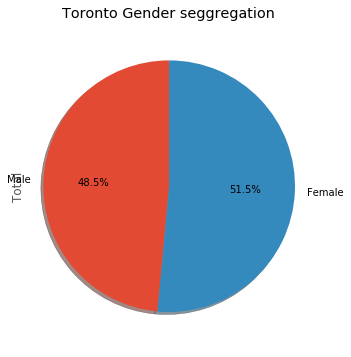

In [10]:
toronto_gnd_plt = toronto_pop.T
toronto_gnd_plt.columns = ['Total']
toronto_gnd_plt = toronto_gnd_plt[1:]

#Call the function to plot the gender data for City of Toronto
PlotGenderData(toronto_gnd_plt,'Toronto')

#### Plot New York City Population Data(*with Gender split*)

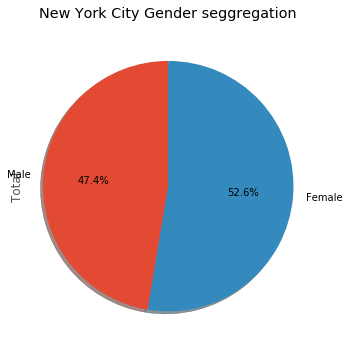

In [29]:
nyc_pop_gender = nyc_pop_gender[['Male', 'Female','Total']]
nyc_gnd_plt = nyc_pop_gender.T
nyc_gnd_plt.columns = ['Total']
nyc_gnd_plt = nyc_gnd_plt[:2].astype('int64')

#Call the function to plot the gender data for Ne York City
PlotGenderData(nyc_gnd_plt,'New York City')

#### Plot a Trend line with population data obtained in data frame *nyc_tnt_pop_hist_data*

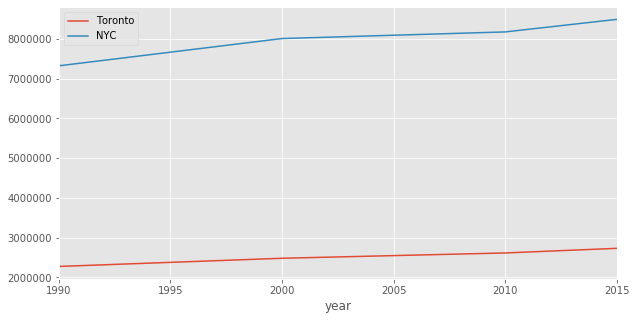

In [12]:
#Call the plot function available as part of the matplotlib library
nyc_tnt_pop_hist_data.plot(x='year', y=['Toronto', 'NYC'], figsize=(10,5), grid=True)

### Preparing the data to form a Word cloud to showcase top 15 ethnic Groups in each city

In [35]:
### Word cloud Toronto Data Frame

#extract data of top groups with percentage of representation frm each group in percentage as available in the data frame
tnt_word_df = toronto_top_20_ethnic_groups[['Top 20 Ethnic origins in the City of Toronto','Percentage']][:-1]

#Initiate a empty list hich can store the top ethnic groups names based on the percentage of share
tnt_ethnic_words = []

#Run a loop to populate the above initialized list
for index, row in tnt_word_df.iterrows():
    range_number = round(row["Percentage"])
    word = row["Top 20 Ethnic origins in the City of Toronto"]
    for i in range(0, range_number):
        tnt_ethnic_words.append(word)

#Convert list to text string as the input for ord cloud is text
tnt_words_text = ",".join(map(str,tnt_ethnic_words))

### Word cloud New York City Data Frame ###

#extract data of top groups with percentage of representation frm each group in percentage as available in the data frame
nyc_ethnic_top15 = nyc_ehtnic_lang_data[4]
nyc_word_df = nyc_ethnic_top15[["Country of birth","% of all immigrants"]][1:]

#Initiate a empty list hich can store the top ethnic groups names based on the percentage of share
nyc_ethnic_words = []

#Run a loop to populate the above initialized list
for index, row in nyc_word_df.iterrows():
    range_number = round(row["% of all immigrants"])
    word = row["Country of birth"]
    for i in range(0, range_number):
        nyc_ethnic_words.append(word)

#Convert list to text string as the input for ord cloud is text
nyc_words_text = ",".join(map(str,nyc_ethnic_words))

#### Install Word Cloud, if not aready done

In [14]:
#install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


### Plot Word Cloud for Toronto Data

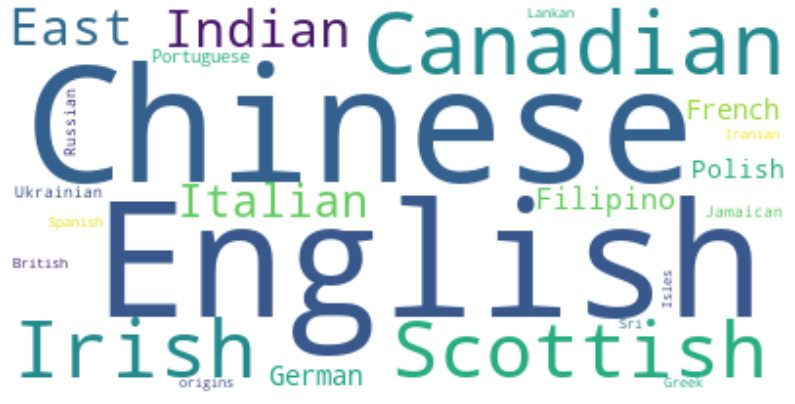

In [36]:
### instantiate a word cloud object
stopwords = set(STOPWORDS)

toronto_ethnic_wc = WordCloud(background_color='white',
    max_words=2000,
    stopwords=stopwords,
    collocations=False)

### generate the word cloud
toronto_ethnic_wc.generate(tnt_words_text)

### display the word cloud

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(toronto_ethnic_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Plot Word Cloud for New York Data

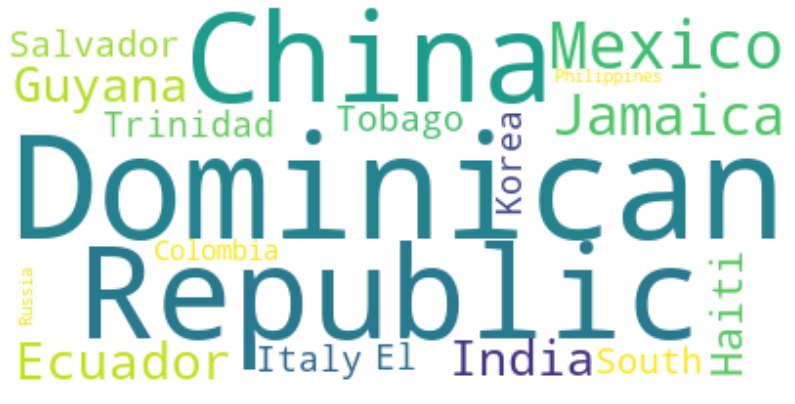

In [37]:
### instantiate a word cloud object
stopwords = set(STOPWORDS)

nyc_ethnic_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    collocations=False)

### generate the word cloud
nyc_ethnic_wc.generate(nyc_words_text)

### display the word cloud

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(nyc_ethnic_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Preparing the neighborhood data and use Folium libraries for plotting the map on neighborhoods

#### *Preparing the NYC Data for extraction of neighborhood data*

In [17]:
#use https://cocl.us/new_york_dataset to extract the neighborhood data of NYC
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
#print(newyork_data.head())
neighborhoods_data = newyork_data['features']

#define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

#instantiate the dataframe
nyc_neighborhood_data = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    nyc_neighborhood_latlon = data['geometry']['coordinates']
    nyc_neighborhood_lat = nyc_neighborhood_latlon[1]
    nyc_neighborhood_lon = nyc_neighborhood_latlon[0]
    
    nyc_neighborhood_data = nyc_neighborhood_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': nyc_neighborhood_lat,
                                          'Longitude': nyc_neighborhood_lon}, ignore_index=True)

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
nyc_latitude = location.latitude
nyc_longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(nyc_latitude, nyc_longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### *Create and plot Folium Map for New York Data*

In [18]:
#create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=10)

#add markers to map
for lat, lng, borough, neighborhood in zip(nyc_neighborhood_data['Latitude'], nyc_neighborhood_data['Longitude'], nyc_neighborhood_data['Borough'], nyc_neighborhood_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### *Preparing the City of Toronto Data for extraction of neighborhood data*

In [19]:
#extract data from "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" for neighborhood
raw_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

#extract the data and create into data frame
df = pd.DataFrame(raw_data[0])
df = df.loc[df["Borough"] != "Not assigned"]
df = df.reset_index()
df_test = df.set_index(['Postcode','Borough'])
result = df_test.groupby(level=['Postcode','Borough'], sort=False).agg( ','.join)
result = result.reset_index(level=['Postcode', 'Borough'])
result.loc[result["Neighbourhood"] == "Not assigned"]

for i, row in result.iterrows():
    if row[2] == "Not assigned":
        result.at[i,'Neighbourhood'] = row[1]

geo_data = pd.read_csv('http://cocl.us/Geospatial_data')

final_df = geo_data.sort_values(by=["Postal Code"])
final_result  = result.sort_values(by=["Postcode"])

final_result["Latitude"] = final_df["Latitude"]
final_result["Longitude"] = final_df["Longitude"]

final_result = final_result.reset_index(drop=True)
final_result.rename(columns={'Postcode': 'PostalCode'}, inplace=True)

toronto_data = final_result.reset_index(drop=True)

#### *Create and plot Folium Map for Toronto Neighborhood Data*

In [20]:
#create map of Toronto using latitude and longitude values of any of the neighbourhoods in Toronto

tnt_latitude = toronto_data.loc[0, 'Latitude']
tnt_longitude = toronto_data.loc[0, 'Longitude']

map_toronto = folium.Map(location=[tnt_latitude, tnt_longitude], zoom_start=10)

#Add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Extract Location Data(Venues) using FourSquare API

#### *Define Four Square Credentials and Version*

In [21]:
CLIENT_ID = 'G5WE1PHEDHOGGESGBRXKLGLITARNJUQ1QGVJX4WNSPCIDI2E' # your Foursquare ID
CLIENT_SECRET = 'RD3UKMC5YYGHL22ISN1J5E3O2CJCH1LIGY3SDBIOOKH4NHBS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G5WE1PHEDHOGGESGBRXKLGLITARNJUQ1QGVJX4WNSPCIDI2E
CLIENT_SECRET:RD3UKMC5YYGHL22ISN1J5E3O2CJCH1LIGY3SDBIOOKH4NHBS


#### Extract Location data for NYC

In [22]:
# Define radius of search for venues and number of venues to be fetched
LIMIT = 100
radius = 500

#define URL for NYC location data extraction
nyc_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            nyc_latitude, 
            nyc_longitude, 
            radius, 
            LIMIT)
nyc_url

nyc_results = requests.get(nyc_url).json()

From the Foursquare API Modules, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [23]:
#### function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Extract Venue data by category column to create a plot the data using a word cloud

In [24]:
#Extract venues list
nyc_venues = nyc_results['response']['groups'][0]['items']
    
nearby_venues_nyc = json_normalize(nyc_venues) # flatten JSON

#filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_nyc =nearby_venues_nyc.loc[:, filtered_columns]

#filter the category for each row
nearby_venues_nyc['venue.categories'] = nearby_venues_nyc.apply(get_category_type, axis=1)

#clean columns
nearby_venues_nyc.columns = [col.split(".")[-1] for col in nearby_venues_nyc.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues_nyc.shape[0]))

nyc_venue_categories = nearby_venues_nyc[['categories']]

# create csv file of nyc_venue_categories to access for wordd cloud
nyc_venue_categories.to_csv('nyc_venue_word_cloud.csv', sep=',', index=False)

100 venues were returned by Foursquare.


#### Create and plot the Word cloud data

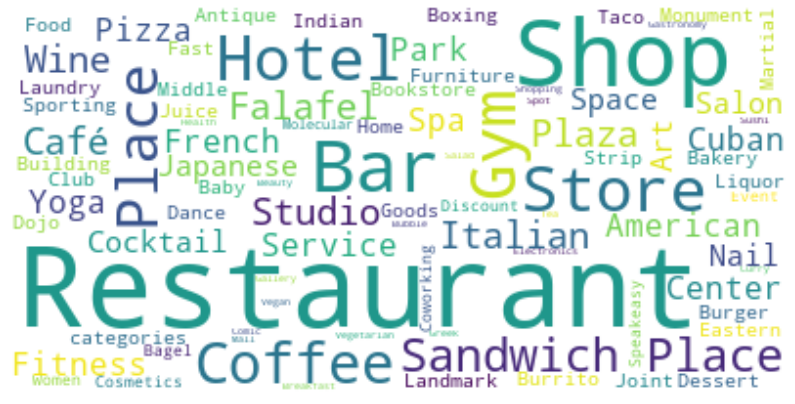

In [25]:
### Display Word Cloud for NYC Data

#read the data from nyc_venue_word_cloud.csv
nyc_venue = open('nyc_venue_word_cloud.csv', 'r').read()

#instantiate a word cloud object
stopwords = set(STOPWORDS)

nyv_venue_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

#generate the word cloud
nyv_venue_wc.generate(nyc_venue)

#display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

#Plot
plt.imshow(nyv_venue_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Extract Location data and venue list for Toronto

In [33]:
### Word cloud for Toronto Data
radius = 1000
toronto_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            tnt_latitude, 
            tnt_longitude, 
            radius, 
            LIMIT)
tnt_results = requests.get(toronto_url).json()

tnt_venues = tnt_results['response']['groups'][0]['items']
    
nearby_venues_tnt = json_normalize(tnt_venues) # flatten JSON

#filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_tnt =nearby_venues_tnt.loc[:, filtered_columns]

#filter the category for each row
nearby_venues_tnt['venue.categories'] = nearby_venues_tnt.apply(get_category_type, axis=1)

#clean columns
nearby_venues_tnt.columns = [col.split(".")[-1] for col in nearby_venues_tnt.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues_tnt.shape[0]))

tnt_venue_categories = nearby_venues_tnt[['categories']]

# create csv file of tnt_venue_categories to access for wordd cloud
tnt_venue_categories.to_csv('tnt_venue_word_cloud.csv', sep=',', index=False)

26 venues were returned by Foursquare.


#### Create and plot the Word cloud data

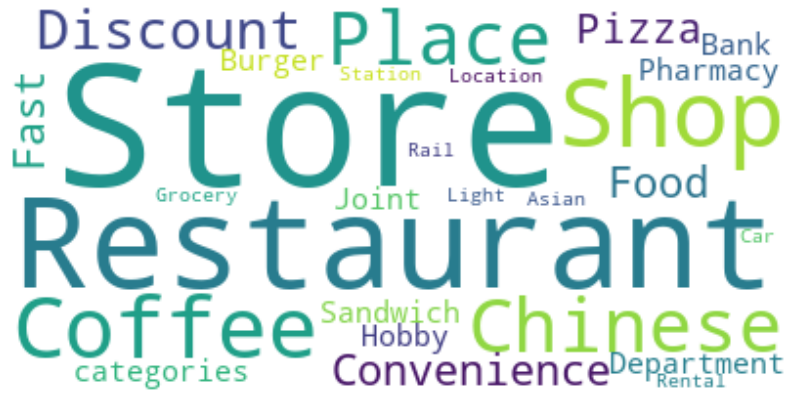

In [34]:
### Display Word Cloud for Toronto Data

# Read the data from tnt_venue_word_cloud.csv
tnt_venue = open('tnt_venue_word_cloud.csv', 'r').read()

#instantiate a word cloud object
stopwords = set(STOPWORDS)

tnt_venue_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

#generate the word cloud
tnt_venue_wc.generate(tnt_venue)

#display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

#Plot
plt.imshow(tnt_venue_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Results and Discussion <a name="results"></a>

Our analysis shows that there is a huge difference beteen the cities in terms of Population Demograpics , when compared to New York City , Toronto seem to be very less populated than NYC, though the gender ratio seems to be of amost same ratio.

When we look at the population history of both the Cities It trended simlarly, upwards in the trend chart presented above. Although we see a huge gap in between population strength that both the cities possess.

Ethnicity by country of origin of the people in both the Cities share a variety of ethnic groups like the NYC mostly consists of the Dominican Republic, China, India, Jamaica, Equador, Korea, Guyana etc., Where as the Toronto's Ethnic groups consists of people from English, Canada, China, Germany, Italy, French etc..

Upon looking at the location data from FourSquare e found that there were only fraction of venues in Toronto (~7) than compared to NYC (>100) , which obviously states that NYC is a very renoned City in terms of population diversity , ethnicity, Business startup's .

By the above factors we can also state that New York City has far more opportunities than Toronto in terms of Business/Shifting to another City, if you ere looking to shift to a new City for Employment opportunities.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to compare two cities and find the differences and mostly seeking to find veriety of differences in terms of populatin density , ethnicity, Business availability.

Final decission has to be made by individuals/stakeholders  based on specific characteristics of neighborhoods and locations in city, taking into consideration additional factors like attractiveness of each location, Educational quotient, real estate availability, prices, social and economic dynamics of every neighborhood etc.